In [43]:
import sys, os, io
sys.path.append(os.path.abspath(os.path.join('..')))

In [44]:
from scripts.dataloader import DataLoader
from scripts.utils import Util

In [45]:
driver_locations_during_request = '../data/driver_locations_during_request.csv'
nb = '../data/nb.csv'

In [46]:
dataloader = DataLoader()

In [47]:
# repo = 'https://github.com/Haylemicheal/Causal-Inference'
# tag = 'raw-data'
# driver_location_content = dataloader.load_from_dvc(driver_locations_during_request, repo, tag)

In [48]:
# nb_content = dataloader.load_from_dvc(nb, repo, tag)

In [49]:
df_driver_loc = dataloader.read_csv(driver_locations_during_request)
df_nb = dataloader.read_csv(nb)

In [50]:
df_driver_loc.head(5)

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [51]:
df_nb.head(5)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


In [52]:
util = Util()

In [53]:
percent_driver, count_driver = util.get_missing(df_driver_loc)

In [54]:
print(count_driver)

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


### The created_at and the updated_at columns doesn't have values. So I will drop both columns

In [55]:
df_driver_loc = util.drop_column(df_driver_loc, "created_at")
df_driver_loc = util.drop_column(df_driver_loc, "updated_at")

In [56]:
percent_driver, count_driver = util.get_missing(df_driver_loc)

In [57]:
print(count_driver)

id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
dtype: int64


In [58]:
df_nb = df_nb.dropna()
percent_nb, count_nb = util.get_missing(df_nb)

In [59]:
print(count_nb)

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64


In [60]:
df_driver_loc.shape

(1557740, 6)

In [61]:
df_nb.shape

(534368, 5)

In [62]:
len(df_driver_loc["driver_id"].unique())

1213

There are 1213 drivers

In [63]:
distances = []
for i in range(df_nb['Trip Origin'].shape[0]):
    try:
        start = df_nb['Trip Origin'][i]
        end = df_nb['Trip Destination'][i]
        start = start.split(',')
        end = end.split(',')
        distance = util.get_distance(start, end)
        distances.append(distance)
    except:
        distances.append(None)
        pass

In [64]:
df_nb['distance'] = distances

In [65]:
df_nb.head(5)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,distance
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319


In [66]:
merged_df = df_driver_loc.merge(df_nb, how='inner', right_on='Trip ID', left_on='order_id')

In [67]:
percent, count = util.get_missing(merged_df)

In [68]:
merged_df.shape

(1555718, 12)

In [69]:
df_nb.shape

(534368, 6)

In [70]:
count

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time        0
Trip End Time          0
distance            2934
dtype: int64

In [71]:
merged_df = merged_df.dropna()

In [72]:
merged_df.head(5)

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,distance
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319


In [73]:
percent, count = util.get_missing(merged_df)
count

id                  0
order_id            0
driver_id           0
driver_action       0
lat                 0
lng                 0
Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
distance            0
dtype: int64

In [74]:
merged_df.to_csv('../data/merged.csv')

<AxesSubplot: >

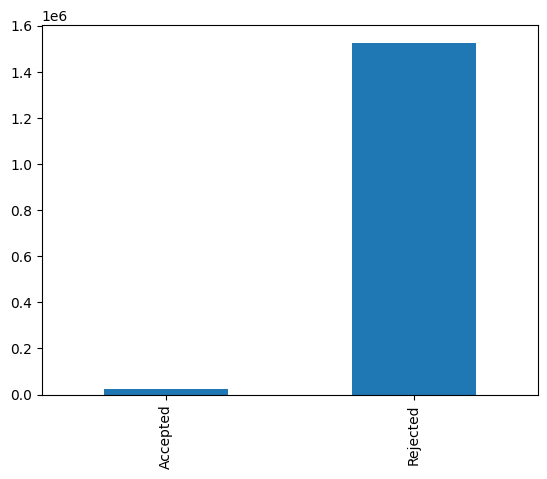

In [75]:
import pandas as pd
accepted = merged_df[merged_df['driver_action'] == "accepted"]
rejected = merged_df[merged_df['driver_action'] == "rejected"]
pd.Series([accepted.shape[0], rejected.shape[0]], index=["Accepted", "Rejected"]).plot(kind="bar")

#### From the graph above we can see that the number of rejections are not even comparable with the accepted orders. The rejection orders are much bigger than the accepted orders.

In [76]:
years = []
months = []
days = []
times = []
for i in range(df_nb['Trip Start Time'].shape[0]):
    try:
        date = df_nb['Trip Start Time'][i]
        year, month, day, time = util.split_date(date)
        years.append(year)
        months.append(month)
        days.append(day)
        times.append(time)
    except:
        years.append(None)
        months.append(None)
        days.append(None)
        times.append(None)

In [77]:
#df_nb = df_nb.dropna()

In [78]:
hours = []
minutes = []
seconds = []
for i in range(len(times)):
    try:
        hour, minute, second = util.split_time(times[i])
    except:
        hour, minute, second = None, None, None
    hours.append(hour)
    minutes.append(minute)
    seconds.append(second)

In [79]:
df_nb['year'] = years
df_nb['month'] = months
df_nb['day'] = days
df_nb['hour'] = hours

In [80]:
merged_df = df_driver_loc.merge(df_nb, how='inner', right_on='Trip ID', left_on='order_id')
merged_df = merged_df.dropna()

In [81]:
merged_df.head(5)

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,distance,year,month,day,hour
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,2021,07,01,09
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,2021,07,01,09
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,2021,07,01,09
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,2021,07,01,09
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,2021,07,01,09


In [82]:
groupby_month = merged_df.groupby('month')

In [83]:
accepted = merged_df[merged_df['driver_action'] == "accepted"]
rejected = merged_df[merged_df['driver_action'] == "rejected"]

In [84]:
accepted_groupby_month = accepted.groupby('month').count()
rejected_groupby_month = rejected.groupby('month').count()

<AxesSubplot: xlabel='month'>

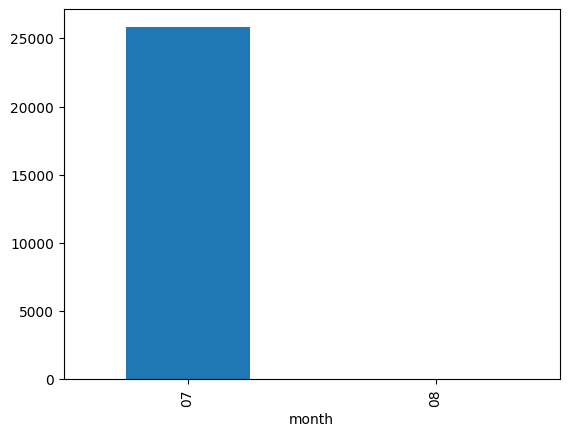

In [85]:
accepted_groupby_month['id'].plot(kind="bar")

<AxesSubplot: xlabel='month'>

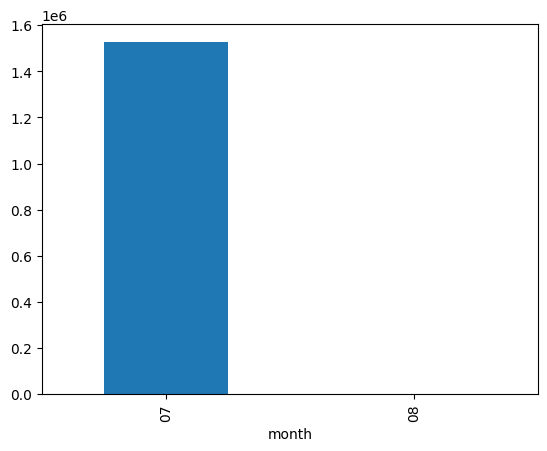

In [86]:
rejected_groupby_month['id'].plot(kind="bar")

In [87]:
accepted_groupby_hour = accepted.groupby('hour').count()
rejected_groupby_hour = rejected.groupby('hour').count()

<AxesSubplot: xlabel='hour'>

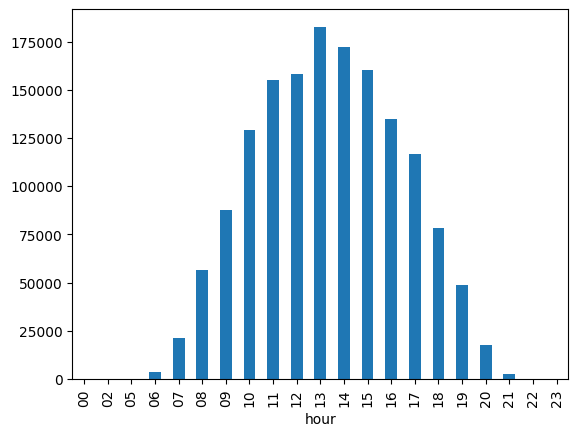

In [88]:
rejected_groupby_hour['id'].plot(kind="bar")

<AxesSubplot: xlabel='hour'>

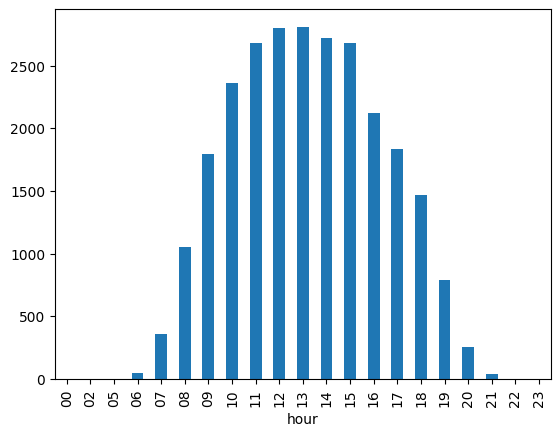

In [89]:
accepted_groupby_hour['id'].plot(kind="bar")

In [90]:
merged_df.to_csv('../data/merged_final.csv')